<a href="https://colab.research.google.com/github/italo2403/B.I/blob/main/Rela%C3%A7%C3%A3o_Tomada_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.55
    Uninstalling yfinance-0.2.55:
      Successfully uninstalled yfinance-0.2.55


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [4]:
carteira

Ticker,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
...,...,...
2025-04-16,5.8846,128317.00000
2025-04-17,5.8654,129650.00000
2025-04-22,5.8071,130464.00000


In [5]:
carteira = carteira.dropna()
carteira

Ticker,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
2007-01-08,2.1465,42830.00000
...,...,...
2025-04-16,5.8846,128317.00000
2025-04-17,5.8654,129650.00000
2025-04-22,5.8071,130464.00000


In [6]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
2007-01-08,2.1465,42830.00000
...,...,...
2025-04-16,5.8846,128317.00000
2025-04-17,5.8654,129650.00000
2025-04-22,5.8071,130464.00000


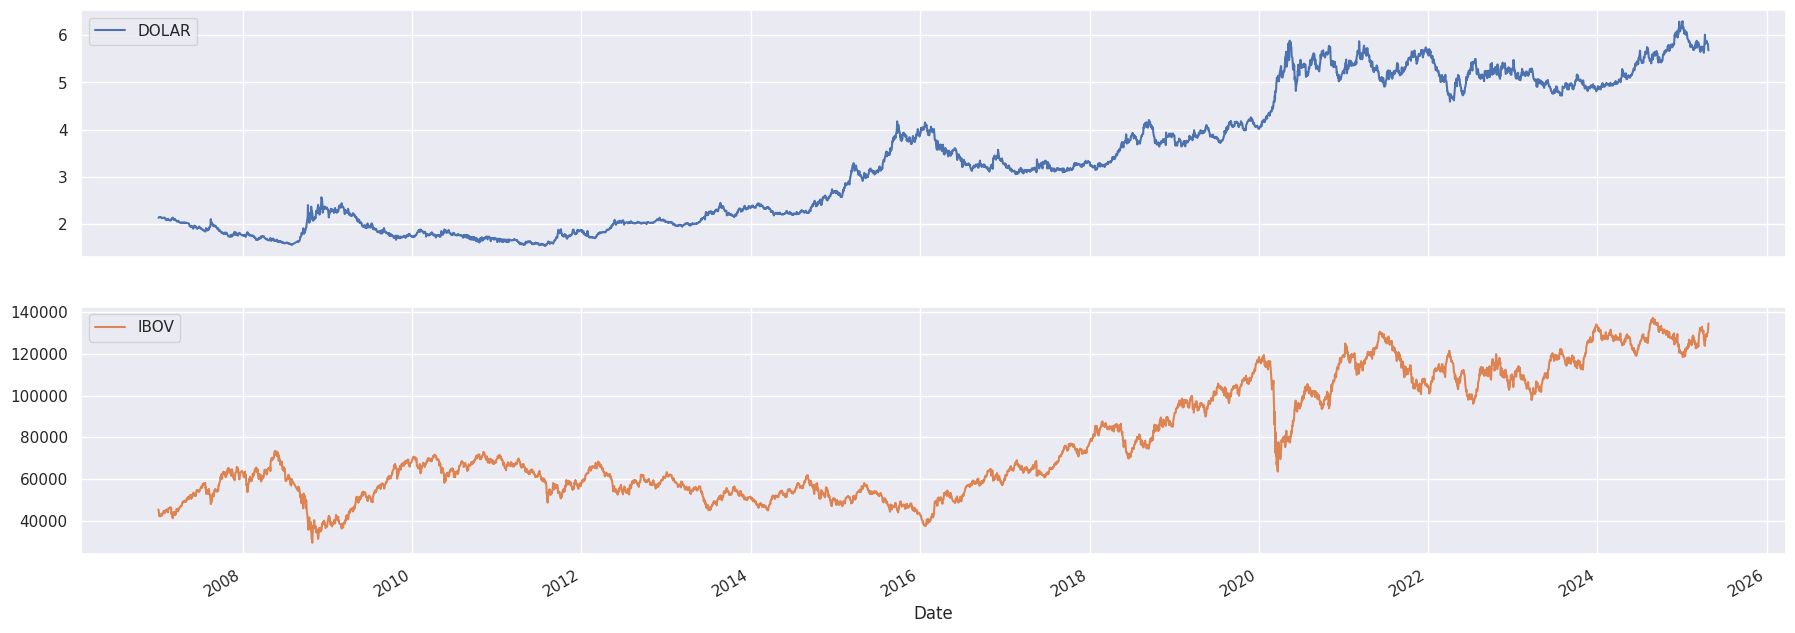

In [7]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [8]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2025-04-16,0.005193,-0.007180
2025-04-17,-0.003263,0.010388
2025-04-22,-0.009940,0.006278


from matplotlib import pyplot as plt
retornos['DOLAR'].plot(kind='hist', bins=20, title='DOLAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
retornos['IBOV'].plot(kind='hist', bins=20, title='IBOV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
retornos.plot(kind='scatter', x='DOLAR', y='IBOV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
retornos['DOLAR'].plot(kind='line', figsize=(8, 4), title='DOLAR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
retornos['IBOV'].plot(kind='line', figsize=(8, 4), title='IBOV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
retornos.describe()

,DOLAR,IBOV
count,4500.000000,4500.000000
mean,0.000286,0.000384
std,0.011700,0.016811
min,-0.104792,-0.147797
25%,-0.005992,-0.008025
50%,0.000060,0.000546
75%,0.006268,0.009031
max,0.101524,0.146560


<Axes: xlabel='Date'>

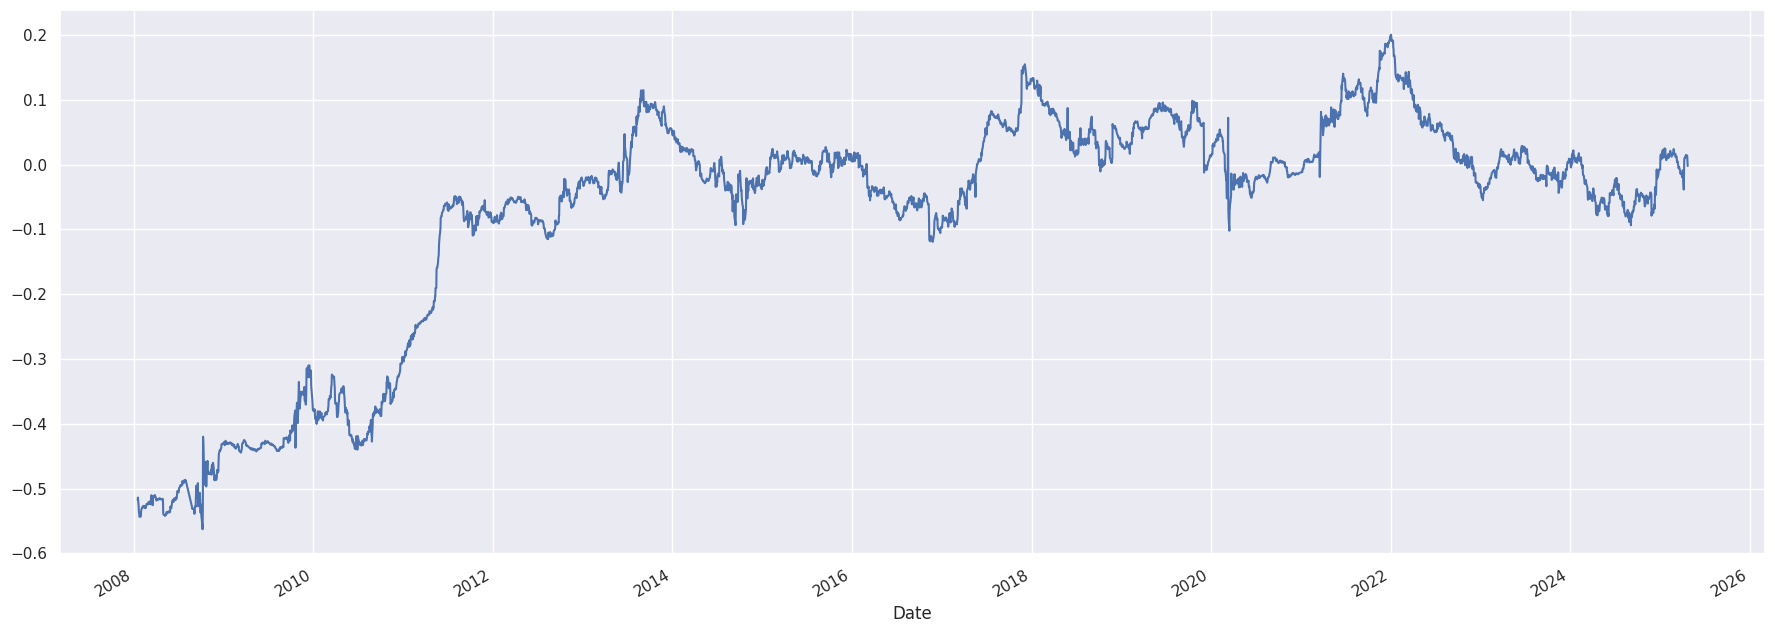

In [10]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))